In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
from visualization import to_State_mesh_simple, draw_heatmap_simple
from PolicyGrad import Policy, sim_policy

In [3]:
from simulation_lib import *
# Set global digit printing options
np.set_printoptions(precision=4)

# Define Training and Model Parameters
num_players = 5           # Total number of agents

# Default simulation parameters

kappa = 0.5
sim_dict = {
        'perm_price_impact': torch.tensor(0.05).cuda(),
        'transaction_cost': torch.tensor(.1).cuda(),
        'liquidation_cost': torch.tensor(.1).cuda(),
        'running_penalty': torch.tensor(0.0).cuda(),
        'trans_impact_scale':torch.tensor(0.02).cuda(),
        'trans_impact_decay':torch.tensor(0.5).cuda(),
        'T': torch.tensor(5).cuda(),
        'dt': torch.tensor(0.5).cuda(),
        'N_agents': num_players,
        'drift_function': (lambda x, y: kappa*(10-y)),
        'volatility': torch.tensor(0.1).cuda(),
        #'initial_price_var': .2,
        'init_inv_var': torch.tensor(50).cuda()}

# compute invariant distribution for initial price variance
inv_std = sim_dict['volatility']* torch.sqrt((1 - torch.exp(-2*kappa*sim_dict['T']))/ (2*kappa))
sim_dict['initial_price_var'] = torch.tensor(inv_std).cuda()

norm_mean = torch.tensor([2.25, 10, 0, 0 ]).cuda()
norm_std = torch.tensor([1.4361406616345072, 0.74204157112471332, 4.512414940762905, 0.33068192958806433 ]).cuda()

sim_obj = MarketSimulator(sim_dict, store_hist = False, impact='sqrt')

<ipython-input-3-bddfccec9c9a>:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sim_dict['initial_price_var'] = torch.tensor(inv_std).cuda()


In [4]:
pol = Policy(2 + 3).cuda()
pol.load_state_dict(torch.load('pt_files/Fic_play_ddqn/pol_net_it.pt'))

<All keys matched successfully>

C:\Users\Brian\PycharmProjects\Nash-DQN\GPU_version\Clean Files\visualization.py:94: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cur_state = torch.vstack([torch.tensor(s.to_sep_tensor_less(0, norm_mean, norm_std, mean = True)) for s in state_list])


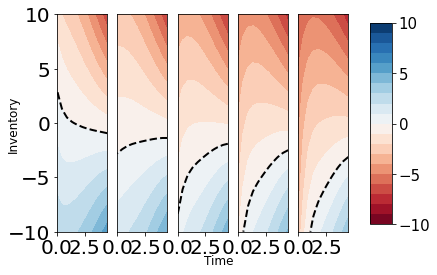

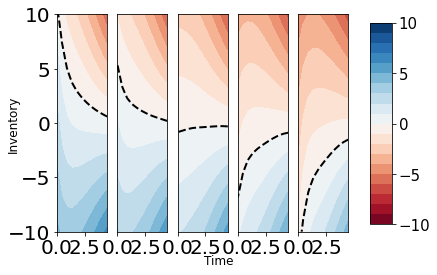

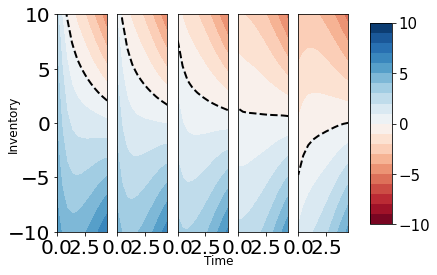

In [5]:
T=sim_dict['T']


draw_heatmap_simple(net=pol,t_step=11,q_step=51,p_step=5,t_range=[0,4.5], norm_mean=norm_mean, norm_std=norm_std,
            q_range=[-10, 10],p_range=[9.5,10.5],n_agents = num_players, other_agent_inv = 0,i_val=.2, a_range = [-10, 10],T=T)

draw_heatmap_simple(net=pol,t_step=11,q_step=51,p_step=5,t_range=[0,4.5], norm_mean=norm_mean, norm_std=norm_std,
            q_range=[-10, 10],p_range=[9.5,10.5],n_agents = num_players, other_agent_inv = 0,i_val=0, a_range = [-10, 10],T=T)

draw_heatmap_simple(net=pol,t_step=11,q_step=51,p_step=5,t_range=[0,4.5], norm_mean=norm_mean, norm_std=norm_std,
            q_range=[-10, 10],p_range=[9.5,10.5],n_agents = num_players, other_agent_inv = 0,i_val=-.2, a_range = [-10, 10],T=T)


In [6]:
# %%capture
import torch
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

from NashRL import *
from NashAgent_lib import NashNN
from textwrap import wrap
from visualization import *

from simulation_lib import MarketSimulator

            
#Initialize a dummy agent
num_players = 5           # Total number of agents
T = 5                    # Total number of time steps


kappa = 0.5
sim_dict = {
        'perm_price_impact': torch.tensor(0.05).cuda().detach(),
        'transaction_cost': torch.tensor(.1).cuda().detach(),
        'liquidation_cost': torch.tensor(.1).cuda().detach(),
        'running_penalty': torch.tensor(0.0).cuda().detach(),
        'trans_impact_scale':torch.tensor(0.02).cuda().detach(),
        'trans_impact_decay':torch.tensor(0.5).cuda().detach(),
        'T': torch.tensor(5).cuda().detach(),
        'dt': torch.tensor(0.5).cuda().detach(),
        'N_agents': num_players,
        'drift_function': (lambda x, y: kappa*(10-y)),
        'volatility': torch.tensor(0.1).cuda().detach(),
        #'initial_price_var': .2,
        'init_inv_var': torch.tensor(50).cuda().detach()}

T=sim_dict['T']

# compute invariant distribution for initial price variance
inv_std = sim_dict['volatility']* torch.sqrt((1 - torch.exp(-2*kappa*sim_dict['T']))/ (2*kappa))
sim_dict['initial_price_var'] = torch.tensor(inv_std).cuda().detach()

sim_obj = MarketSimulator(sim_dict, impact='sqrt')

norm_mean2 = torch.tensor([2.25, 10, 0, 0, 0 ]).cuda().detach()
norm_std2 = torch.tensor([1.4361406616345072, 0.74204157112471332, 2.5, 0.1, 1 ]).cuda().detach()

nash_agent = NashNN(non_invar_dim=5, n_players=sim_obj.N,
                    output_dim=5, max_steps=10,
                    terminal_cost=sim_dict['liquidation_cost'], num_moms=0)

net_file_name = "pt_files/Nash_DQN/Action_Net.pt"

nash_agent.action_net.load_state_dict(torch.load(net_file_name))

CUDA IS AVAILABLE!


<All keys matched successfully>

[ 9.5   9.75 10.   10.25 10.5 ]
[ 9.5   9.75 10.   10.25 10.5 ]
[ 9.5   9.75 10.   10.25 10.5 ]


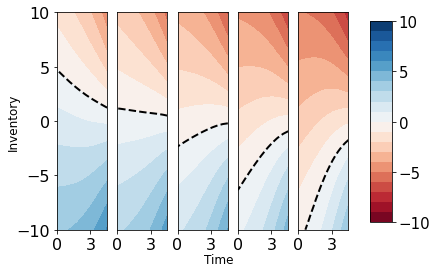

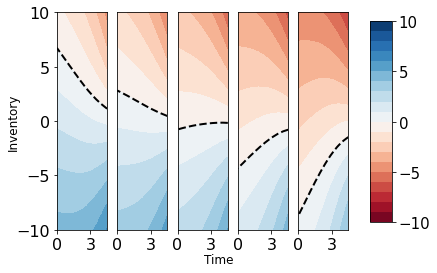

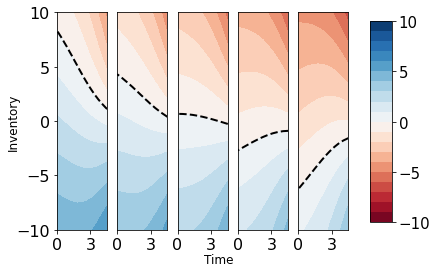

In [7]:
# Measure Change in Impact State

draw_heatmap(net=nash_agent,t_step=11,q_step=51,p_step=5,t_range=[0,4.5], norm_mean=norm_mean2, norm_std=norm_std2,
            q_range=[-10, 10],p_range=[9.5,10.5],n_agents = num_players, other_agent_inv = 0,i_val=.2, a_range = [-10, 10],T=T, is_numpy=False,
            norm_input=True)

draw_heatmap(net=nash_agent,t_step=11,q_step=51,p_step=5,t_range=[0,4.5], norm_mean=norm_mean2, norm_std=norm_std2,
            q_range=[-10, 10],p_range=[9.5,10.5],n_agents = num_players, other_agent_inv = 0,i_val=0, a_range = [-10, 10],T=T, is_numpy=False,
             norm_input=True)

draw_heatmap(net=nash_agent,t_step=11,q_step=51,p_step=5,t_range=[0,4.5], norm_mean=norm_mean2, norm_std=norm_std2,
            q_range=[-10, 10],p_range=[9.5,10.5],n_agents = num_players, other_agent_inv = 0,i_val=-.2, a_range = [-10, 10],T=T, is_numpy=False,
             norm_input=True)

In [8]:
it_lim = 1000
num_trials = 100

In [9]:
all_nash_rewards = []
for i in range(num_trials):
    _, _, reward_arr_1 = sim_policy(sim_obj, norm_mean2, norm_std2, norm_mean2, norm_std2, nash_agent, nash_agent, it_lim=it_lim, nash_a0=True, nash_a1=True, sim_tens=True, cmb=False)
    all_nash_rewards.append(torch.stack([torch.stack(a) for a in reward_arr_1]))
all_nash_rewards = torch.stack(all_nash_rewards)

Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Fi

Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Fi

Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Fi

In [10]:
all_fic_rewards = []
for i in range(num_trials):
    _, _, reward_arr_1 = sim_policy(sim_obj, norm_mean, norm_std, norm_mean, norm_std, pol, pol, it_lim=it_lim, nash_a0=False, nash_a1=False, sim_tens=True, cmb=False)
    all_fic_rewards.append(torch.stack([torch.stack(a) for a in reward_arr_1]))
all_fic_rewards = torch.stack(all_fic_rewards)

Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Fi

Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Fi

Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Fi

In [11]:
first_nash_rewards = []
for i in range(num_trials):
    _, _, reward_arr_1 = sim_policy(sim_obj, norm_mean2, norm_std2, norm_mean, norm_std, nash_agent, pol, it_lim=it_lim, nash_a0=True, nash_a1=False, sim_tens=True, cmb=False)
    first_nash_rewards.append(torch.stack([torch.stack(a) for a in reward_arr_1]))
first_nash_rewards = torch.stack(first_nash_rewards)

Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Fi

Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Fi

Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Fi

In [12]:
first_fic_rewards = []
for i in range(num_trials):
    _, _, reward_arr_1 = sim_policy(sim_obj, norm_mean, norm_std, norm_mean2, norm_std2, pol, nash_agent, it_lim=it_lim, nash_a0=False, nash_a1=True, sim_tens=True, cmb=False)
    first_fic_rewards.append(torch.stack([torch.stack(a) for a in reward_arr_1]))
first_fic_rewards = torch.stack(first_fic_rewards)

Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Fi

Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Fi

Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Finishing epoch: 600
Finishing epoch: 700
Finishing epoch: 800
Finishing epoch: 900
Finishing epoch: 0
Finishing epoch: 100
Finishing epoch: 200
Finishing epoch: 300
Finishing epoch: 400
Finishing epoch: 500
Fi

Text(0.5, 0, 'Rewards')

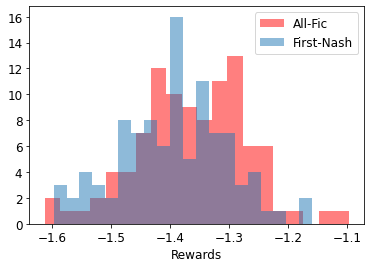

In [13]:
plt.hist(all_fic_rewards.sum(dim=2)[:,:,0].mean(dim=1).cpu().numpy(), bins=20,color='r', alpha=0.5, label='All-Fic')
plt.hist(first_nash_rewards.sum(dim=2)[:,:,0].mean(dim=1).cpu().numpy(), bins=20, alpha=0.5, label='First-Nash')
plt.legend()
plt.xlabel("Rewards")

Text(0.5, 0, 'Rewards')

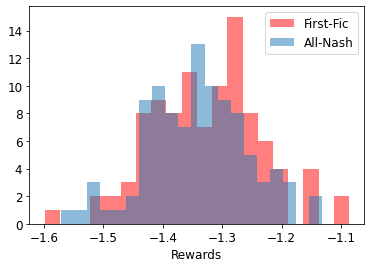

In [14]:
plt.hist(first_fic_rewards.sum(dim=2)[:,:,0].mean(dim=1).cpu().numpy(), bins=20, color='r', alpha=0.5, label = 'First-Fic')
plt.hist(all_nash_rewards.sum(dim=2)[:,:,0].mean(dim=1).cpu().numpy(), bins=20, alpha=0.5, label='All-Nash')
plt.legend()
plt.xlabel("Rewards")

In [16]:
nash_sim_dict = {
    'all_fic_rewards':all_fic_rewards,
    'all_nash_rewards':all_nash_rewards,
    'first_fic_rewards':first_fic_rewards,
    'first_nash_rewards':first_nash_rewards
}
import pickle 
with open('pt_files/comparison_summary.pickle', 'wb') as handle:
    pickle.dump(nash_sim_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)